Name: Elliot B. Martindale, K-number: K21047860, Email Address: elliot.martindale@kcl.ac.uk

In [13]:
# import modules
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator as Aer
import numpy as np
import random

# QUANTUM CRYPTOGRAPHY: QKD, BB84 and Shor's Algorithm

## Introduction to Quantum Cryptography

Quantum cryptography leverages the principles of quantum mechanics to achieve secure communication, primarily through Quantum Key Distribution (QKD). Unlike classical cryptographic systems that rely on computational complexity, quantum cryptography utilises phenomena such as superposition, and the no-cloning theorem to ensure security. This approach is inherently resistant to attacks from quantum computers, which pose significant threats to traditional encryption methods.

### Fundamental Principles
1. **Superposition**: A qubit can be in a combination of `|0>` and `|1>` states.
2. **Measurement in Different Bases**: Measurements in the standard basis and diagonal basis;
    - **Computational Basis (Pauli-Z)**: `|0>` = (1,0) and `|1>` = (0,1)
    - **Diagonal Basis (Pauli-X)**: `|+>` = $\frac{1}{\sqrt{2}}$(1,1) and `|->` = $\frac{1}{\sqrt{2}}$(1,-1)
3. **No-Cloning Theorem**: A Theorem that asserts that it is impossible to create an exact copy of an arbitrary unknown quantum state. Consequently, any attempt at eavesdropping introduces detectable disturbances in the system, thereby preserving the integrity of the communication. Mathematically, for a unitary operator $(U)$ and an arbitrary quantum state $(|\psi⟩)$, cloning would require:

$$
U(|\psi\rangle \otimes |e\rangle) = |\psi\rangle \otimes |\psi\rangle,
$$
where \(|e⟩\) is an auxiliary "blank" state. The No-Cloning Theorem proves that no such \(U\) exists [Weigert2009].


The concept of superposition allows a qubit to exist in a linear combination of states until measured, where the superposition collapses such that the qubit takes one of the previously superposed states. Entanglement is the idea that links the properties of particles such that by measuring the state of one, one can instantaneously determine the state of the other - even at a distance. The No-Cloning Theorem prohibits the exact copying of unknown arbitrary quantum states, thus ensuring that any attempt to intercept quantum information introduces detectable disturbances [Lindblad1999].

## Quantum Key Distribution (QKD)
QKD is a technique in cryptography that allows two parties to communicate a secret key to each other, even in the presence of an eavesdropper.

For simplicity, we introduce communicators, ‘Alice’ and ‘Bob’, who aim to share a message securely over a potentially insecure channel of communication with an eavesdropper we'll call 'Eve'. The idea behind QKD is to encode information into quantum states, and transmit these states over a quantum channel*.

*Quantum Channels can transmit quantum states i.e., polarised photons; are subject to quantum mechanical rules such as superposition collapsing upon measurement.

### The Role of Quantum States in QKD
Information is transmitted via polarised photons, representing the `|0⟩`, `|1⟩` states or a linear combination of the two. The photons are polarised by passing them through specific filters that align their polarisation to either a standard (computational) basis (vertical for `|0⟩` and horizontal for `|1⟩`) or a diagonal basis (45° for `|+⟩` and 135° for `|−⟩`).
Both bases (computational and diagonal) are known as mutually unbiased bases [Gribling2021], meaning that a state prepared in one basis appears as a random 50-50 probability distribution when measured in the other basis.

### BB84 Protocol

The BB84 Protocol was developed in 1984 by Charles Bennett and Gilles Brassard and is one of the fundamental protocols of Quantum Key Distribution. Bennett and Brassard introduced it as a revolutionary approach to secure communication and its aim was to address two fundamental issues in classical cryptography: the vulnerability of classical encryption to computational attacks and the inherent challenges of secure key distribution.

At its core, the BB84 Protocol exploits the principles of quantum mechanics to encode information into quantum states, such as the polarisation of photons, such that any interference/eavesdropping will result in the collapse of the "wavefunction" superposition, disturbing their original state. The key feature of quantum states is that any attempt to measure or intercept them disturbs their original state, collapsing the superposition and introducing detectable errors. This ensures that Alice and Bob, the communicating parties previously mentioned, can not only securely exchange cryptographic keys but also detect the presence of an eavesdropper. The protocol’s reliance on quantum channels for transmitting qubits provides a level of security unattainable with classical systems, making BB84 a cornerstone of modern quantum cryptography. Below, we shall run through step-by-step, how to BB84 protocol works.

We begin with an initialisation by Alice; a defined "encoding" process. She decides on two parameters for each qubit she will send to Bob: a randomly chosen bit and a basis (of our mutually unbiased bases) in which to prepare bit. The code cell below defines a function to encode the bit into a random basis.

In [14]:
# function to encode a bit in a random basis
def encode_bit(bit): # bit is 0 or 1
    # Create a new quantum circuit with one qubit (and one classical bit to measure the qubit)
    qc = QuantumCircuit(1, 1)
    if bit == 1: # if the bit is 1, flip the qubit to |1> using 'NOT' (X) gate
        qc.x(0)
    basis = random.choice(["Z", "X"]) # randomly choose a basis
    if basis == "X": # if the basis is diagonal, apply Hadamard gate to collapse the qubit to |+> or |->
        qc.h(0)
    return qc, basis

Now Alice randomly chooses a string of `n` bits to initialise in a chosen base to send to Bob.

In [15]:
n_bits = 50  # Number of bits to transmit
alice_bitstring = [random.randint(0, 1) for _ in range(n_bits)]
alice_bases = []
alice_states = []
for bit in alice_bitstring:
    state, basis = encode_bit(bit)
    alice_states.append(state)
    alice_bases.append(basis)

print("Alice's bits:", alice_bitstring)
print("Alice's bases:", alice_bases)

Alice's bits: [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
Alice's bases: ['Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X']


Now we initialise Bob's random basis choices (either `X` or `Z`) for each qubit measurement; note that Bob has no knowledge of the bases used by Alice to prepare the qubit string.

In [16]:
bob_bases = [random.choice(["Z", "X"]) for i in range(n_bits)]
print("Bob's bases:", bob_bases)

Bob's bases: ['Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z']


Bob now needs to measure the incoming qubits from Alice in the basis he chose, there is a very small chance that his chosen basis align with Alice's. 

If Bob chooses the correct basis (Alice's), he will correctly determine thet bit value that Alice sent. If not, then the measurement outcome is random and the qubit will collapse into one of the states in Bob's chosen basis.

In [17]:
#  define a function that measures Alice's bit in the basis Bob received
def measure_bit(state, basis):
    # Apply the measurement basis
    if basis == "X":
        # Directly apply the Hadamard gate to the state vector
        qc = QuantumCircuit(1) # Create a new quantum circuit with one qubit
        qc.h(0) # Apply Hadamard gate to the qubit
        state = Statevector(state).evolve(qc) # Apply the Hadamard gate to the state vector
    # Calculate the probability of measuring |0> or |1>
    statevector = Statevector(state) # Convert the state to a state vector
    probabilities = statevector.probabilities_dict() # probabilities of measuring |0> and |1>
    prob_zero = probabilities.get('0', 0) # probability of measuring |0>
    prob_one = probabilities.get('1', 0)  # probability of measuring |1>
    return 0 if random.random() < prob_zero else 1 # randomly choose 0 or 1 based on the probabilities

bob_results = [measure_bit(alice_states[i], bob_bases[i]) for i in range(n_bits)] # measure each qubit in the basis Bob received from Alice
print("Bob's measurements of Alice's bit-string in his own basis:", bob_results)

Bob's measurements of Alice's bit-string in his own basis: [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]


Once all qubits have been sent and measured, Alice and Bob compare the basis they used over a public (classical) channel. It is important to ntoe that they DO NOT reveal the actual measurment results or the bit values, only the bases that they each used. 

An eavesdropper, listening in, learns which bases were used but does not know:

1. - The original quantum states Alice sent.
2. - The measurement results Bob obtained.

Note that in the function `measure_bit`, there is no need to explicitly add `if basis == standard (= Z)` because the standard basis measurement is the default when no transformation (like a Hadamard gate) is applied. Now we cross-examine both bit strings and output the final bit key elements as those who are equal in both Alice's and Bob's key.

In [18]:
key_indices = [i for i in range(n_bits) if alice_bases[i] == bob_bases[i]] # indices where Alice and Bob used the same basis
alice_key = [alice_bitstring[i] for i in key_indices] 
bob_key = [bob_results[i] for i in key_indices]

print("Alice's final key:", alice_key)
print("Bob's final key:", bob_key)

Alice's final key: [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]
Bob's final key: [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]


Alice and Bob can perform an error correction to ensure their keys are identical. Since there is no eavesdropper introduced yet, there is no need.

#### Agreement Rate
The agreement rate measures the consistency between the keys generated by Alice and Bob. A high agreement rate indicates that the keys are highly correlated, which is essential for secure communication. If the agreement rate is low, it suggests the presence of an eavesdropper or errors in the transmission process. Therefore, monitoring the agreement rate helps in detecting potential security breaches and ensuring the integrity of the key exchange process. In this instance, since there has been no interference or attempt of interception, we should expect the agreement rate between the final keys' to be 100%. We shall perform a sanity test below to ensure that the code is algorithm is working correctly.

In [19]:
agreement_consistency = sum([alice_key[i] == bob_key[i] for i in range(len(alice_key))]) / len(alice_key) # 
print("Key agreement rate:", agreement_consistency)

Key agreement rate: 1.0


### Introducing an Eavesdropper (Eve)

We shall now introduce an eavesdropper (called 'Eve'). Eve intercepts each qubit that Alice sends to Bob, randomly chooses a measurement basis for each qubit interception and measures the qubit in her chosen basis. Eve attempts to recreate Alice's qubit and send it to Bob, with the aim of obtaining information without being detected and mimicking the original information to Bob. 
However, Eve faces a challenge: she cannot determine which basis Alice used to prepare each qubit.

Measuring the qubit in the wrong basis forces the superposition to collapse into a random state within her chosen basis, rather than the specific state Alice initially sent. For example, if Eve measures a qubit in the standard basis, she will force it to collapse randomly either to the `|0>` or `|1>` state -  with equal probability of either. In either case, this measurement does not reveal the original `|+⟩` encoding from Alice, and Eve loses the initial state information.

This disturbance introduces errors into the transmission, altering the key Bob receives. So when Alice and Bob compare a subset of their key over a public channel, these inconsistencies reveal Eve's presence. They can then apply a 'privacy amplification' process to reduce the amount of information an eavesdropper might have gained; which could entail anything from applying a hash function (or similar) to the "reconciled" key. This function should be designed to vary based on the error detection rate.

In [20]:
eve_bases = [random.choice(["Z", "X"]) for _ in range(n_bits)]
eve_results = []

for i in range(n_bits):
    eve_result = measure_bit(alice_states[i], eve_bases[i])
    eve_results.append(eve_result)
    # Eve prepares a new state based on her measurement and basis
    qc = QuantumCircuit(1)
    if eve_result == 1: 
        qc.x(0) 
    if eve_bases[i] == "X":
        qc.h(0) 
    alice_states[i] = Statevector.from_instruction(qc)  # Update Alice's state with Eve's interference

bob_results_with_eve = [measure_bit(alice_states[i], bob_bases[i]) for i in range(n_bits)] # Bob measures the qubits he received from Alice
print("Bob's measurements after Eve:", bob_results_with_eve)
print("Alice's initial bits:", alice_bitstring)

Bob's measurements after Eve: [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
Alice's initial bits: [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]


By analysing each index on Bob's string and comparing it with Alice's intial string, it is clear to see that Eve has failed to go undetected. When Eve attempts to intercept and measure the qubits sent by Alice, the act of measurement collapses the quantum state into one of the basis states associated with her chosen basis (in `eve_bases`), thereby disturbing the original state. As a result, when Eve tries to replicate the qubit and send it to Bob, the replicated state is not identical to the original; thus the No-Cloning Theorem is present and working. 

In [21]:
# detect eavesdropping
sample_indices = random.sample(range(len(key_indices)), len(key_indices) // 2) # randomly choose half of the indices where Alice and Bob used the same basis
mismatch_count = sum([alice_key[i] != bob_results_with_eve[i] for i in sample_indices]) # count the number of mismatches between Alice's key and Bob's key with Eve

if mismatch_count > 0:
    print("Eavesdropping detected.")
else:
    print("No eavesdropping detected.")

Eavesdropping detected.


### To Discard or not to Discard?
An eavesdropper attempting to intercept and measure these qubits inevitably introduces errors due to the random basis mismatch during her measurements, disturbing the transmitted quantum states. In order to identify potential eavesdropping, Alice and Bob publicly compare a random subset of their keys, revealing the basis that they each used and using this to check the consistency of their results. Any discrepancies between their keys (of which they can now observe subsets, and view them both in the same basis), would indicate that there exists an eavesdropper who has altered Alice's quantum bit-string.

The Error Rate defined in the code cell below is calculated as a proportion of mismatched bits in the sampled subset of the keys, and acts as a measure of the channel's security.  If the error rate remains below a predefined threshold, Alice and Bob can confidently retain the untested portion of the key, assuming minimal eavesdropper interference. If the error rate exceeds the threshold, it suggests significant eavesdropping activity. 

In [22]:
# Step 1: Eavesdropping detection using a sample
sample_indices = random.sample(range(len(key_indices)), len(key_indices) // 2)
mismatch_count = sum([alice_key[i] != bob_results_with_eve[i] for i in sample_indices])

# Set an error rate threshold (e.g., 10%)
error_rate_threshold = 0.1
sample_size = len(sample_indices)
actual_error_rate = mismatch_count / sample_size

# Step 2: Determine if the error rate is acceptable
if actual_error_rate <= error_rate_threshold:
    print("Error rate within acceptable limits. Proceeding with the key.")
    # Retain only bits not in the sample, as they haven't been publicly compared
    secure_key = [alice_key[i] for i in range(len(alice_key)) if i not in sample_indices]
else:
    print("Error exceeds threshold. Applying privacy amplification.")
    # Privacy amplification: keep only part of the key to minimize Eve's possible information
    secure_key = [alice_key[i] for i in range(len(alice_key)) if i not in sample_indices]
    secure_key = secure_key[:len(secure_key) // 2]  # apply hash function; keep only half the bits

print("Error rate measured:", actual_error_rate)
print("Final, secure, agreed-upon key:", secure_key)

Error exceeds threshold. Applying privacy amplification.
Error rate measured: 0.4
Final, secure, agreed-upon key: [1, 1, 1, 1, 0, 0, 0]


If eavesdropping is detected, Alice and Bob minimise the information Eve might have gained by using a privacy amplification method. They take a sample of their shared key, discard likely compromised bits based on the error rate, and apply a publicly shared hash function to produce a shorter, secure key. In this project, the hash function used was to remove half of the bits in the string.
If the error rate exceeds a tolerable threshold, they discard the entire key and restart the protocol. This ensures the remaining key is secure and resistant to Eve's interference.

Remember, Eve does not know whether her chosen basis aligns with Alice's so her measurement introduces errors in the qubit string that Bob receives. 
Put simply, if Eve measures a qubit in the computational (`Z`) basis when it was prepared in the diagonal (`X`) basis, her measurement outcome will be random. She has a 50% probability of collapsing the state into either `|0⟩` or `|1⟩`, regardless of the actual state. Any attempt to recreate the original qubit (in order to go undetected) will result in a $50\%$ probability of matching the original state. Since the bases used by Alice and Bob are share post measurement, this problem is unavoidable for Eve; highlighting the inherent security of the BB84 Protocol.

### Simulating BB84 Protocol: Quantum Circuit via Qiskit
Below, we utilise qiskit to create a visual representation of the quantum circuit for `n_bits`. To reduce computational expenditure, we shall recall the algorithm and use a lower number of bits [IBM2023].

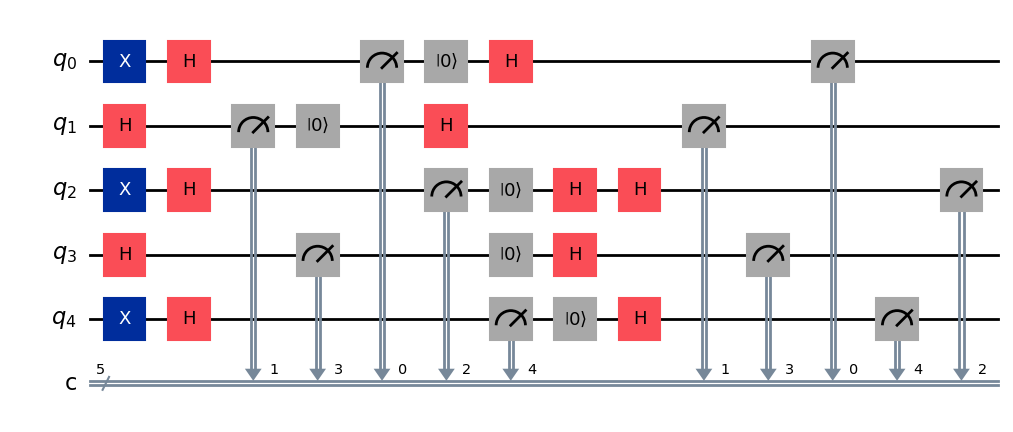

In [23]:
n_bits = 5

alice_bits = [random.randint(0, 1) for i in range(n_bits)] 
alice_bases = [random.choice(["Z", "X"]) for i in range(n_bits)]

bob_bases = [random.choice(["Z", "X"]) for i in range(n_bits)]
eve_bases = [random.choice(["Z", "X"]) for i in range(n_bits)]

qc = QuantumCircuit(n_bits, n_bits) # simulate bb84 via quantum circuit

# Alice's encoding
for i in range(n_bits):
    if alice_bases[i] == "Z":
        # If Alice chooses Z basis:
        if alice_bits[i] == 1:
            qc.x(i)  # Apply X gate if the bit is 1
    elif alice_bases[i] == "X":
        # If Alice chooses X basis:
        if alice_bits[i] == 1:
            qc.x(i)  # Apply X gate to flip the qubit
        qc.h(i)  # Apply Hadamard to encode in the X basis

# Eve's measurements
for i in range(n_bits):
    # Eve applies H only if her basis is X and Alice's basis was not X
    if eve_bases[i] == "X" and alice_bases[i] != "X":
        qc.h(i) # Apply Hadamard gate to the qubit
    qc.measure(i,i) # Measure the qubit and store the result in the classical bit
    qc.reset(i) # Reset the qubit to |0> state
    if eve_bases[i] == "X":
        qc.h(i) # Apply Hadamard gate to the qubit if her basis is X

# Bob's measurements
for i in range(n_bits):
    if bob_bases[i] == "X":
        qc.h(i)  # Bob applies H if his basis is X
qc.measure(range(n_bits), range(n_bits))

qc.draw(output='mpl')

The quantum circuit above represents a randomly produced BB84 protocol implementation of `n_bits`. We introduce `n_bits` many qubits and pair them up each with a classical bit (`C`) to store the measurement.
Note that the first measurement is done by Eve which, of course, collapses the superposition into one of the states. She attempts to be undetectable by applying a Hadamard gate in order to re-encode the qubit with the same basis she used.

### Limitations of QKD
Current QKD systems rely on fragile hardware like single-photon detectors and sources, which are susceptible to environmental noise. Forms of "noise" could include photon loss and depolarisation of photons. Such sources of noise introduce random errors in the transmitted qubits, leading to discrepancies between Alice's and Bob's keys even in the absence of eavesdropping.

There is another pressing problem in QKD known as 'Denial of Service' (DoS). This problem occurs when Eve intercepts Alice's key and, whilst she may not guess the correct basis for each qubit entry, she alters Bob's final key so much that there is close to no correlation between Alice's and Bob's keys. This results in zero information being passed between Alice and Bob. This poses a very real threat, proving that current QKD systems are vulnerable to attacks that disrupt communication channels without directly intercepting data [Kish-et-al.2024].

## RSA Encryption and Shor's Algorithm
RSA Encryption is relies on the classical computational cost of factoring large integers, `N`, into their prime components. A public key is used to encrypt messages/data, whilst a private key is used for decryption. Classical algorithms are inefficient in computing `N` as a product of prime factors, only solving it with an exponential time complexity - ensuring the security of RSA, via classical computers.

However, quantum computers pose a threat to RSA. Enter Shor's Algorithm.

Shor's algorithm addresses the problem of integer factorisation [Shor1995] and with the use of quantum computers, runs in polynomial time and adopts superposition and interference processes to perform a period-finding operation faster than a classical computer would. Upon calculating the period, the prime factors of `N` can be computed with classical algorithms - thus rendering RSA (soon to be) insecure with the rise of quantum computation.

# Bibliography
[Reddy&Mohan2023] Reddy, SujayKumar and Chandra Mohan. “Comprehensive Analysis of BB84, A Quantum Key Distribution Protocol.” ArXiv abs/2312.05609 (2023) {https://arxiv.org/pdf/2312.05609}

[Lindblad1999] {Lindblad, G. A General No-Cloning Theorem. Letters in Mathematical Physics 47, 189–196 (1999). https://doi.org/10.1023/A:1007581027660}

[Weigert2009] {Weigert, Stefan. (2009). No-Cloning Theorem. 10.1007/978-3-540-70626-7_124.}

[IBM2023] {Qiskit contributors. (2023). Qiskit: An open-source framework for quantum computing. https://qiskit.org}

[Gribling2021] {Gribling, Sander and Sven Polak “Mutually unbiased bases: polynomial optimization and symmetry.” Quantum (2021): (https://arxiv.org/abs/2111.05698)}

[Kish-et-al.2024] {“Mitigation of channel tampering attacks in continuous-variable quantum key distribution.” Physical Review Research (2024): https://arxiv.org/abs/2401.15898}

[Shor1995] {Shor, Peter W.. “Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer.” SIAM Rev. 41 (1995): 303-332.}